In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()



Saving quadnight.JPG to quadnight (5).JPG


**1. Image averaging for Reduction Noise:**

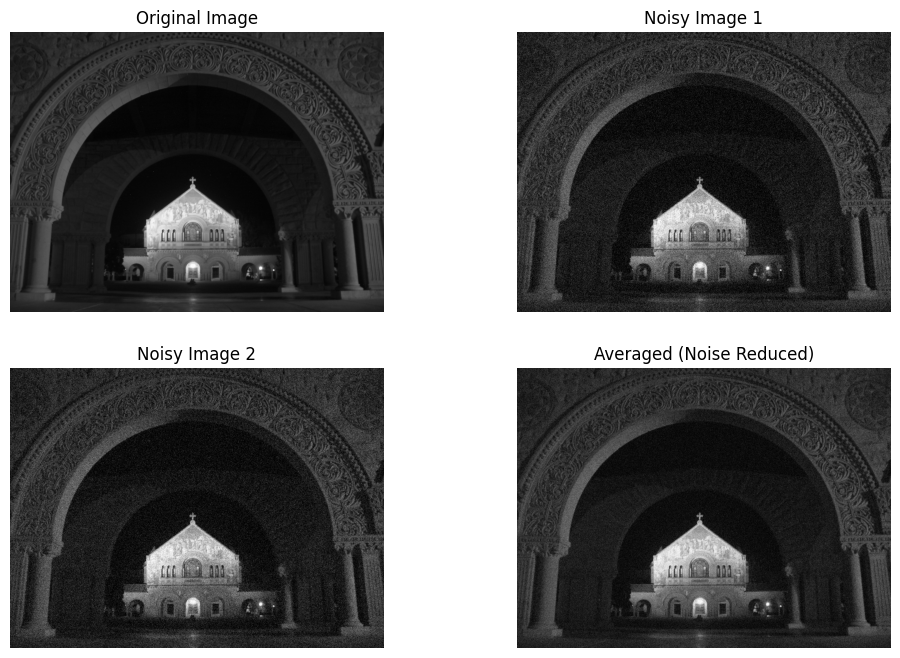

In [ ]:
# Step 1: Read one grayscale image
img = cv2.imread('quadnight.JPG', cv2.IMREAD_GRAYSCALE)

# Step 2: Create multiple noisy versions
def add_noise(image):
    noise = np.random.normal(0, 25, image.shape) # mean=0, std=25
    noisy = image + noise
    return np.clip(noisy, 0, 255).astype(np.uint8)

img1 = add_noise(img)
img2 = add_noise(img)
img3 = add_noise(img)

# Step 3: Average them
average_img = (img1.astype(np.float32) + img2.astype(np.float32) + img3.astype(np.float32)) / 3
average_img = np.clip(average_img, 0, 255).astype(np.uint8)

# Step 4: Display all
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1), plt.imshow(img, cmap='gray'), plt.title('Original Image'), plt.axis('off')
plt.subplot(2,2,2), plt.imshow(img1, cmap='gray'), plt.title('Noisy Image 1'), plt.axis('off')
plt.subplot(2,2,3), plt.imshow(img2, cmap='gray'), plt.title('Noisy Image 2'), plt.axis('off')
plt.subplot(2,2,4), plt.imshow(average_img, cmap='gray'), plt.title('Averaged (Noise Reduced)'), plt.axis('off')
plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()

Saving quadnight.JPG to quadnight (6).JPG


**2. Combination of different exposures for high-dynamic range imaging**

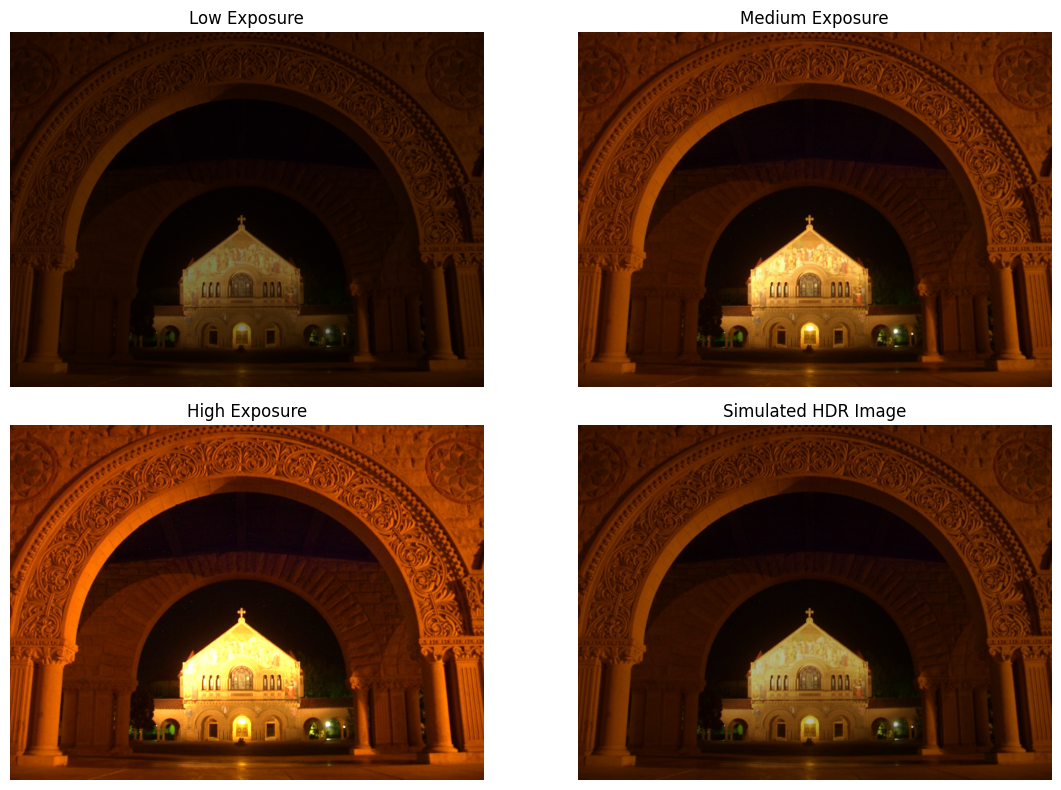

In [ ]:
# Step 1: Read and prepare the image
img = cv2.imread('quadnight.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for correct display

# Step 2: Simulate different exposures
low_exposure = np.clip(img * 0.5, 0, 255).astype(np.uint8)    # darker
medium_exposure = img                                          # normal
high_exposure = np.clip(img * 1.5, 0, 255).astype(np.uint8)    # brighter

# Step 3: Combine exposures to create HDR effect
hdr = cv2.addWeighted(low_exposure, 0.25, medium_exposure, 0.5, 0)
hdr = cv2.addWeighted(hdr, 0.75, high_exposure, 0.25, 0)

# Step 4: Display results
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1), plt.imshow(low_exposure), plt.title('Low Exposure'), plt.axis('off')
plt.subplot(2, 2, 2), plt.imshow(medium_exposure), plt.title('Medium Exposure'), plt.axis('off')
plt.subplot(2, 2, 3), plt.imshow(high_exposure), plt.title('High Exposure'), plt.axis('off')
plt.subplot(2, 2, 4), plt.imshow(hdr), plt.title('Simulated HDR Image'), plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
uploaded1 = files.upload()

Saving lake_1.jpg to lake_1.jpg


Saving lake_2.jpg to lake_2.jpg


**3. Image subtraction for change detection**

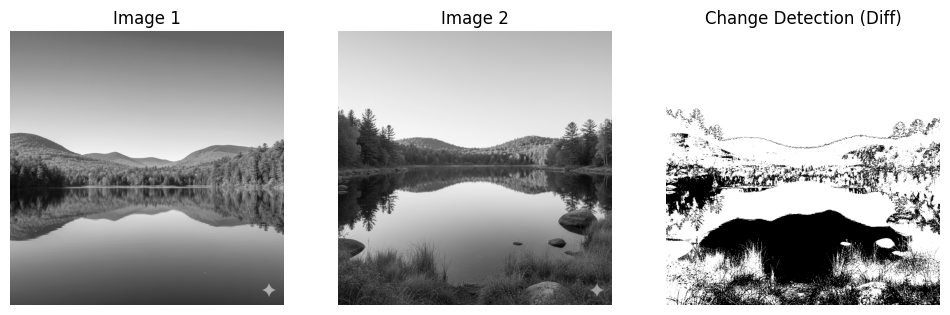

In [ ]:
# Read grayscale images
img1 = cv2.imread('lake_1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('lake_2.jpg', cv2.IMREAD_GRAYSCALE)

# Check if images are the same size
if img1.shape == img2.shape:
    # Compute absolute difference
    diff = cv2.absdiff(img1, img2)

    # Apply thresholding
    _, thresh = cv2.threshold(diff, 25, 255, cv2.THRESH_BINARY)

    # Display results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1), plt.imshow(img1, cmap='gray'), plt.title('Image 1'), plt.axis('off')
    plt.subplot(1, 3, 2), plt.imshow(img2, cmap='gray'), plt.title('Image 2'), plt.axis('off')
    plt.subplot(1, 3, 3), plt.imshow(thresh, cmap='gray'), plt.title('Change Detection (Diff)'), plt.axis('off')
    plt.show()
else:
    print("Images must be of the same size for subtraction")


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()


Saving chf_xray.jpg to chf_xray.jpg


**4. BONUS TASK**

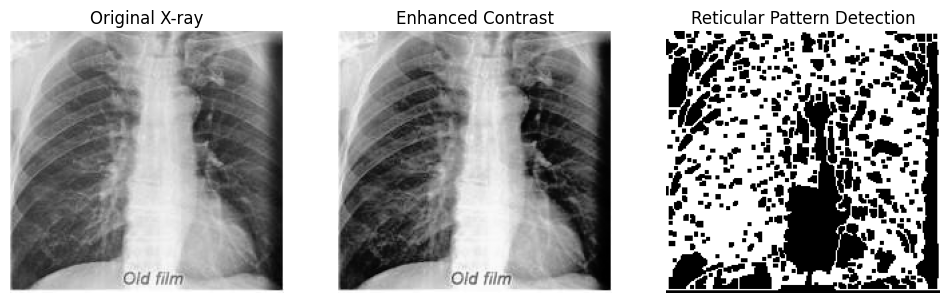

In [ ]:
# Load the chest X-ray image
img = cv2.imread('chf_xray.jpg', cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization to enhance contrast
equalized = cv2.equalizeHist(img)

# Use edge detection to highlight linear patterns (like Kerley B lines)
edges = cv2.Canny(equalized, threshold1=30, threshold2=100)

# Apply morphological operations to emphasize reticular structures
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
morph = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1), plt.imshow(img, cmap='gray'), plt.title('Original X-ray'), plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(equalized, cmap='gray'), plt.title('Enhanced Contrast'), plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(morph, cmap='gray'), plt.title('Reticular Pattern Detection'), plt.axis('off')
plt.show()

TASK_5

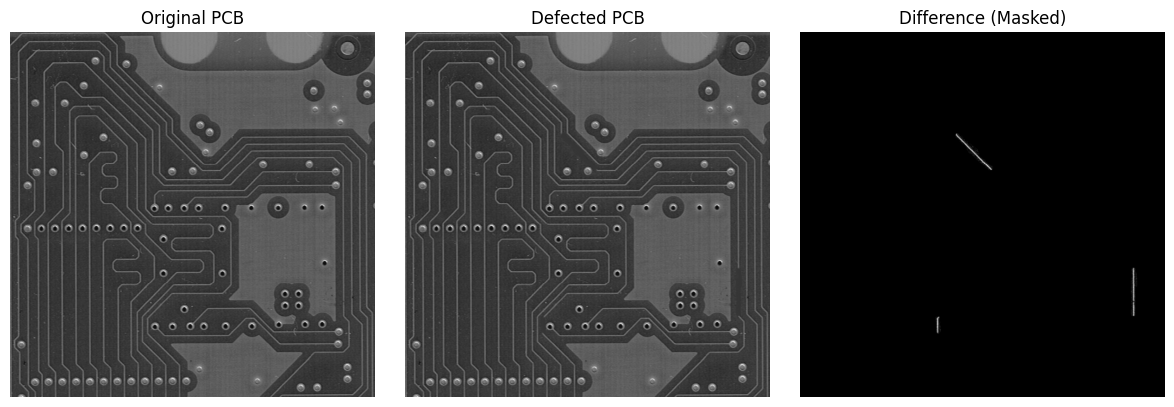

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the two PCB images and the mask
img1 = cv2.imread('pcbCroppedTranslated.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('pcbCroppedTranslatedDefected.png', cv2.IMREAD_GRAYSCALE)
mask = cv2.imread('mask.jpg', cv2.IMREAD_GRAYSCALE)

# Step 2: Check if images loaded successfully
if img1 is None or img2 is None or mask is None:
    raise FileNotFoundError("One or more image files could not be loaded. Check file names and paths.")

# Step 3: Resize mask to match image dimensions if needed
if mask.shape != img1.shape:
    mask = cv2.resize(mask, (img1.shape[1], img1.shape[0]))

# Step 4: Apply mask to both images
masked_img1 = cv2.bitwise_and(img1, img1, mask=mask)
masked_img2 = cv2.bitwise_and(img2, img2, mask=mask)

# Step 5: Compute absolute difference in masked regions
diff = cv2.absdiff(masked_img1, masked_img2)

# Step 6: Normalize difference for better visualization
diff_normalized = cv2.normalize(diff, None, 0, 255, cv2.NORM_MINMAX)

# Step 7: Display results
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(img1, cmap='gray')
plt.title('Original PCB')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img2, cmap='gray')
plt.title('Defected PCB')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(diff_normalized, cmap='gray')
plt.title('Difference (Masked)')
plt.axis('off')

plt.tight_layout()
plt.show()
